# Identity Fraud From Enron Email

### Understanding the Dataset and Question

The purpose of this project is to use machine learning tools to identify Enron 
employees (Persons of Interest -POI) who have committed fraud based on the public Enron 
financial and email dataset. Enron is an energy trading company that had the largest case 
of corporate fraud in US history. POIs are one of 3: indicted, settled without admitting guilt,
or testified in exchange of immunity.

#### The Dataset

The dataset contains about 146 users (18 of them are considered POIs, while 128 are non-POIs) mostly real emails exchanged by senior management of Enron. We can use machine learning on this dataset to answer questions like "can we identify patterns in the emails?", using regression we will be able to understand the relationship between the people's salary and their bonuses for example, and using clustering we can identify who was a member of the board of directors, and who was just an employee.

The dataset has 21 features, that are either financial, email or (POI/non-POI)-related.

In [106]:
#!/usr/bin/python
import warnings; warnings.simplefilter('ignore')
import sys
import pickle
from time import time
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

sys.path.append("C:/JBasineni/Mach_learn/ud120-projects-master/ud120-projects-master/tools/")
sys.path.append('C:/JBasineni/Mach_learn/ud120-projects-master/ud120-projects-master/choose_your_own')
sys.path.append('C:/JBasineni/Mach_learn/ud120-projects-master/ud120-projects-master/datasets_questions')
sys.path.append('C:\JBasineni/Mach_learn/ud120-projects-master')
sys.path.append("../tools/")

import os
os.chdir('C:/JBasineni/Mach_learn/ud120-projects-master/ud120-projects-master/final_project')

# Use seaborn for plotting defaults
import seaborn as sns; sns.set()

%pylab inline

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

enron_data = pickle.load(open("final_project_dataset.pkl", "rb") )
print ('Number of people in the Enron dataset: {0}'.format(len(enron_data)))




Populating the interactive namespace from numpy and matplotlib
Number of people in the Enron dataset: 146


In [107]:
nb_people=len(enron_data)
print ('Number of people in the dataset: ',nb_people)

pois = [x for x, y in enron_data.items() if y['poi']]
print ('Number of POI\'s: {0}'.format(len(pois)))
print ("Proportion of POIs in the dataset:",len(pois)/nb_people)
#nb_poi=sum([data_dict[key]['poi']==1 for key in data_dict])
#print ("Number of persons of interest (POI): ",nb_poi)
#print ("Proportion of POIs in the dataset:",nb_poi/nb_people)

Number of people in the dataset:  146
Number of POI's: 18
Proportion of POIs in the dataset: 0.1232876712328767



We observe that out of 146 persons included in the data set, only 18 persons are considered as persons of interest, which reprents 12.3%. The data set is very unbalanced.

How many features are available in the data set?

In [108]:
# No of features in the ENRON dataset
import pprint
print ('Number of features for each person in the Enron dataset: {0}'.format(len(list(enron_data.values())[0])))
print (' ')
print ('Features Available ')
#pprint.pprint(list(enron_data.values())[1] )
pprint.pprint(list(enron_data['PRENTICE JAMES'].keys()))

Number of features for each person in the Enron dataset: 21
 
Features Available 
['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'loan_advances',
 'bonus',
 'email_address',
 'restricted_stock_deferred',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'from_poi_to_this_person',
 'exercised_stock_options',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'poi',
 'long_term_incentive',
 'shared_receipt_with_poi',
 'restricted_stock',
 'director_fees']


####   Outlier investigation
Are there outliers in the data set? We can start by creating a scatter plot with the salary and bonus features.

In [109]:
#Explore the names of the people

#pprint.pprint(list(enron_data.keys()))
pprint.pprint(enron_data['THE TRAVEL AGENCY IN THE PARK'])

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}


Clearly 'THE TRAVEL AGENCY IN THE PARK' is not a valid person and also all the values have 'NaN'. So this can be removed from out dataset. We also should remove any person who has all the values in the dataset as 'NaN'.

In [110]:
#Check for people whose total payments and total stock value is NULL
outliers =[]
for key in enron_data.keys():
    if  (enron_data[key]['total_payments']=='NaN') & (enron_data[key]['total_stock_value']=='NaN') :
        outliers.append(key)
print ("What's the name of the outlier:",(outliers))

pprint.pprint( (enron_data['POWERS WILLIAM']))

What's the name of the outlier: ['CHAN RONNIE', 'POWERS WILLIAM', 'LOCKHART EUGENE E']
{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': -17500,
 'director_fees': 17500,
 'email_address': 'ken.powers@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 26,
 'from_poi_to_this_person': 0,
 'from_this_person_to_poi': 0,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 12,
 'to_messages': 653,
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}


On further exploration we also found 'CHAN RONNIE', 'POWERS WILLIAM', 'LOCKHART EUGENE E' have toal payments and total stock value as NULL . They also do not have any messages to and from any POI. So I am planning to remove these from the dataset.

In [112]:
# Removing the outliers
enron_data.pop('THE TRAVEL AGENCY IN THE PARK',0)
enron_data.pop('POWERS WILLIAM',0)
enron_data.pop('LOCKHART EUGENE E',0)
enron_data.pop('CHAN RONNIE',0)

0

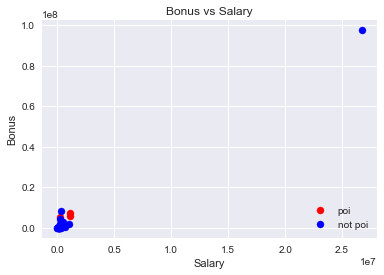

In [113]:
features_list = ["poi","salary", "bonus"]
data = featureFormat(enron_data, features_list, sort_keys = True)
poi=data[:,0]
salary = data[:,1]
bonus = data[:,2]

plt.scatter(salary[poi==1],bonus[poi==1],c='red',s=50,label='poi')
plt.scatter(salary[poi==0],bonus[poi==0],c='blue',s=50,label='not poi')

plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.legend(loc='lower right')
plt.title("Bonus vs Salary")
plt.show()


We can clearly see an outlier with a salary higher than 25,000,000 dollars and a bonus higher than 80,000,000 dollars but not a POI. But who is this outlier?

In [114]:
outliers =[]
for key in enron_data.keys():
    if (enron_data[key]['bonus']!='NaN')& (enron_data[key]['salary']!='NaN'):
        if (int(enron_data[key]['bonus'])>0.8*1e8) & (int(enron_data[key]['salary'])>2.5*1e7):
            outliers.append(key)
print ("What's the name of the outlier:",outliers)

What's the name of the outlier: ['TOTAL']


That solves the mystery. It appears that there is a bug in the data set. The outlier is in fact the total of each variable. Let's remove this outlier.

In [115]:
# We use the method pop to remove in the dictionary the item 'TOTAL.
enron_data.pop('TOTAL',0)
data = featureFormat(enron_data, features_list)

LEts try to check for Outliers again after removing the total row from dataset

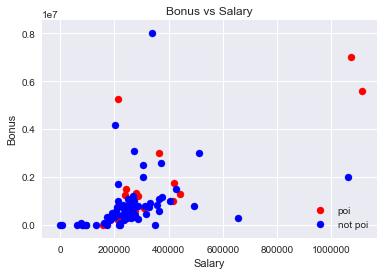

In [116]:
# Let's check for Outliers again
poi=data[:,0]
salary = data[:,1]
bonus = data[:,2]

plt.scatter(salary[poi==1],bonus[poi==1],c='red',s=50,label='poi')
plt.scatter(salary[poi==0],bonus[poi==0],c='blue',s=50,label='not poi')

plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.legend(loc='lower right')
plt.title("Bonus vs Salary")
plt.show()

Now that we have cleaned up our dataset for Outliers and data elements which do not make sense  we can move to feature selection 

# Feature Selection/Engineering

### New Feature

Persons of interest may have strong email connections. POIs might send emails to other POIs at a higher rate than the rest of the population. For this reason, let's create two new features: one that represents the fraction of emails that a person sent to POIs, and another feature that represents the fraction of emails that a person received from POIs.

In [132]:
# Functions to calculate the fraction of emails from /to a person and a POI
def computeFraction(poi_messages, all_messages):
    """ given a number messages to/from POI (numerator) 
        and number of all messages to/from a person (denominator),
        return the fraction of messages to/from that person
        that are from/to a POI
   """
    fraction = 0.
    
    if poi_messages=='NaN' or all_messages=='NaN':
        fraction = 0.
    else:  
        fraction=float(poi_messages)/float(all_messages)

    return fraction


for name in enron_data:

    data_point = enron_data[name]

    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    fraction_from_poi = computeFraction( from_poi_to_this_person, to_messages )
    data_point["fraction_from_poi"] = fraction_from_poi


    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = computeFraction( from_this_person_to_poi, from_messages )
    data_point["fraction_to_poi"] = fraction_to_poi

In [133]:
fraction_to_poifraction =[enron_data[key]["fraction_to_poi"] for key in enron_data]
fraction_from_poi=[enron_data[key]["fraction_from_poi"] for key in enron_data]
poi=[enron_data[key]["poi"]==1 for key in enron_data]

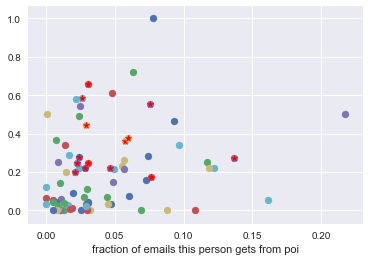

In [135]:
### create new features
### new features are: fraction_to_poi_email,fraction_from_poi_email

def dict_to_list(key,normalizer):
    new_list=[]

    for i in data_dict:
        if data_dict[i][key]=="NaN" or data_dict[i][normalizer]=="NaN":
            new_list.append(0.)
        elif data_dict[i][key]>=0:
            new_list.append(float(data_dict[i][key])/float(data_dict[i][normalizer]))
    return new_list

### create two lists of new features
fraction_from_poi_email=dict_to_list("from_poi_to_this_person","to_messages")
fraction_to_poi_email=dict_to_list("from_this_person_to_poi","from_messages")

### insert new features into data_dict
count=0
for i in enron:
    data_dict[i]["fraction_from_poi_email"]=fraction_from_poi_email[count]
    data_dict[i]["fraction_to_poi_email"]=fraction_to_poi_email[count]
    count +=1

    
features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email"]    
    ### store to my_dataset for easy export below
my_dataset = data_dict


### these two lines extract the features specified in features_list
### and extract them from data_dict, returning a numpy array
data = featureFormat(my_dataset, features_list)

### plot new features
for point in data:
    from_poi = point[1]
    to_poi = point[2]
    plt.scatter( from_poi, to_poi )
    if point[0] == 1:
        plt.scatter(from_poi, to_poi, color="r", marker="*")
plt.xlabel("fraction of emails this person gets from poi")
plt.show()

In [134]:
for i in range(len(poi)):
    if poi[i]==1:
        plt.scatter(fraction_from_poi[poi==1],fraction_to_poi[poi==1],c='red',s=50,label='poi')
    else:
        plt.scatter(fraction_from_poi[poi==0],fraction_to_poi[poi==0],c='blue',s=50,label='not poi')
  

plt.xlabel('Fraction of emails the person received from a POI') 
plt.ylabel('Fraction of emails the person sent to a POI')  

plt.show()

TypeError: 'float' object is not subscriptable